In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt

### Step 1: Read the data from the `Resources` folder into a Pandas DataFrame.

In [31]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
# YOUR CODE HERE!
df = pd.read_csv("../Resources/housing.csv")
# Review the DataFrame
# YOUR CODE HERE!
df = df.fillna(0)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# Look at correlation matrix
print(df.corr())

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.068082 -0.065318           -0.317063     0.920196   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.068082    0.099773    0.055310      -0.015176   
latitude                 -0.065318   -0.108785   -0.071035      -0.079809   
housing_

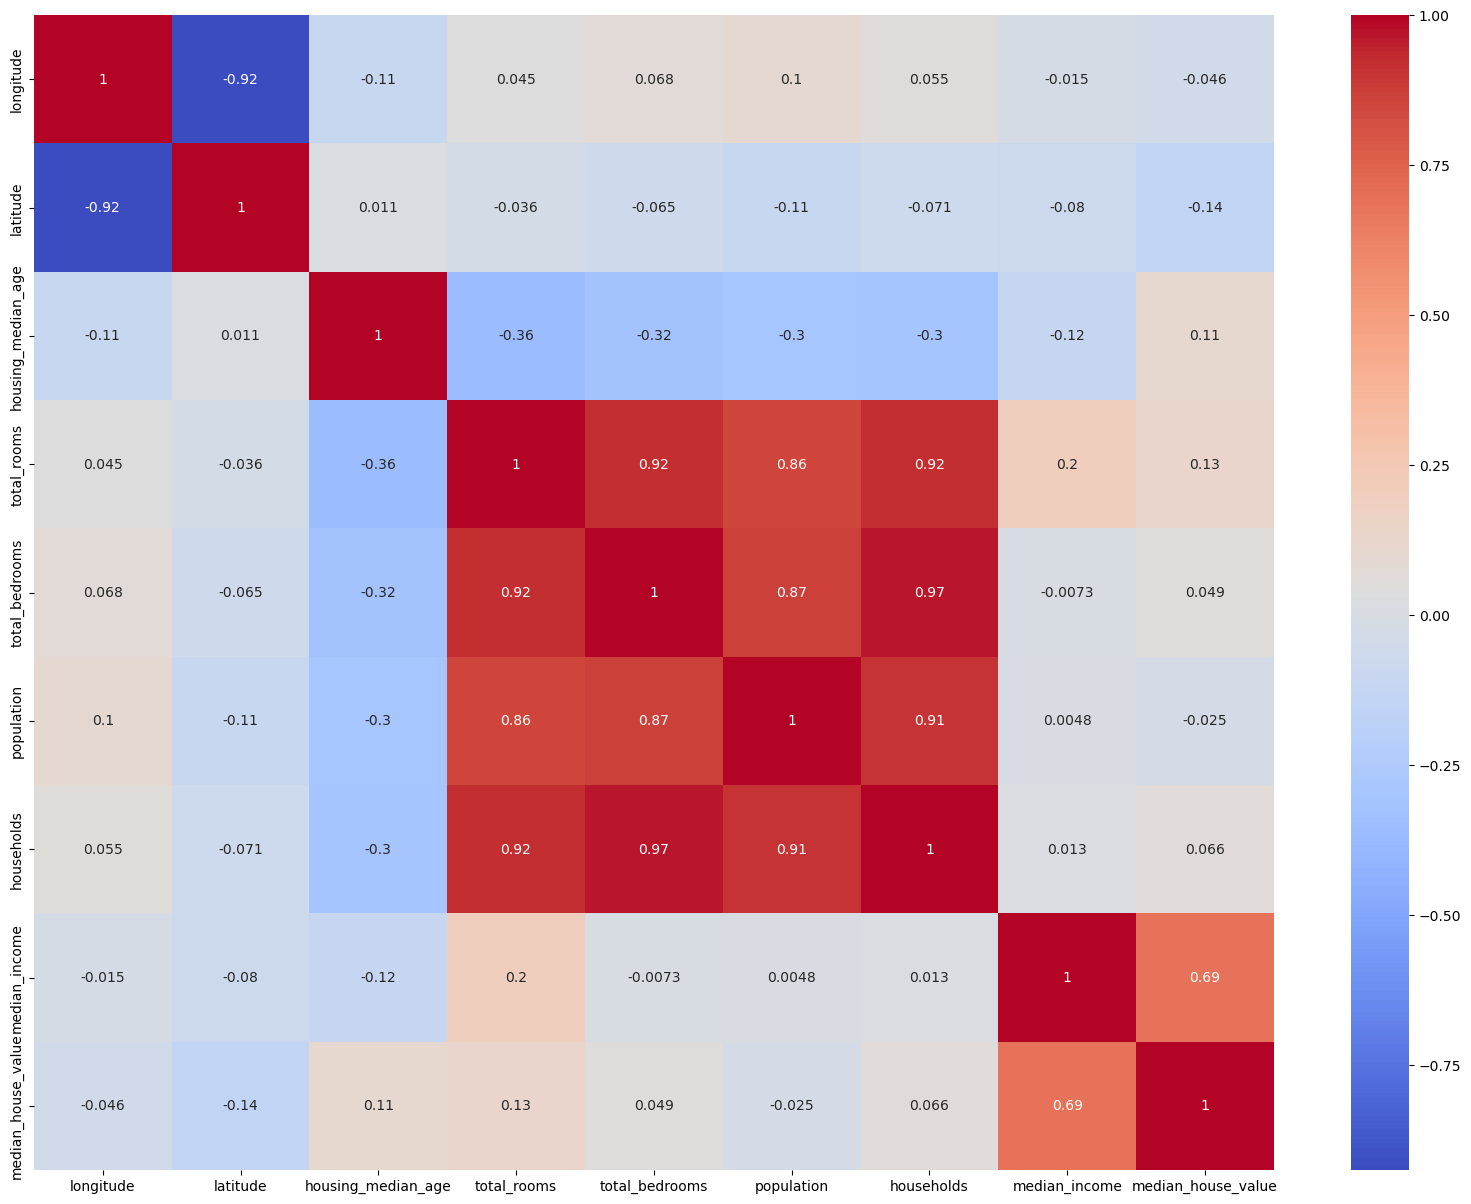

In [4]:
# Plot matrix
plt.figure(figsize=(20, 15))
correlations = df.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [32]:
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'])
df_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [6]:
print(df.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [33]:
# Define features set
data_x = df_encoded.drop(['median_house_value', 'latitude', 'longitude'], axis =1)
y = df['median_house_value'].values.reshape(-1, 1)
X = data_x

In [34]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [35]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [36]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [37]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [38]:
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train.ravel())
y_pred = rf.predict(X_test_scaled)
accuracy = rf.score(X_test_scaled, y_test)
print(accuracy)

0.7137987083507399


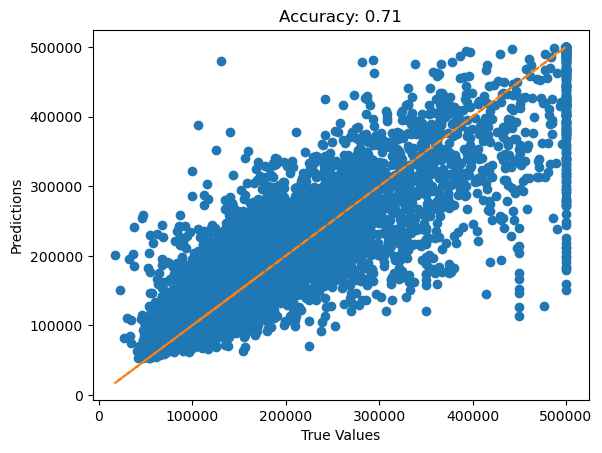

In [39]:
plt.plot(y_test, y_pred, "o")
plt.plot(y_test, y_test, "--")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Accuracy: %.2f" % accuracy)
plt.show()

In [ ]:
n_estimators = [20, 50, 100, 200, 300, 400, 500]
accuracy = []
for n in n_estimators:
    rf_model = RandomForestRegressor(n_estimators=n, random_state=78)
    rf_model = rf_model.fit(X_train_scaled, y_train.ravel())
    predictions = rf_model.predict(X_test_scaled)
    acc = rf_model.score(X_test_scaled, y_test)
    accuracy.append(acc)

In [ ]:
print(accuracy)

In [ ]:
n_estimators = [400,425,450,475,500]
accuracy = []
for n in n_estimators:
    rf_model = RandomForestRegressor(n_estimators=n, random_state=78)
    rf_model = rf_model.fit(X_train_scaled, y_train.ravel())
    predictions = rf_model.predict(X_test_scaled)
    acc = rf_model.score(X_test_scaled, y_test)
    accuracy.append(acc)

In [ ]:
print(accuracy)

In [13]:
rf = RandomForestRegressor(n_estimators=400, max_depth=20, min_samples_split=11, min_samples_leaf=6)
rf.fit(X_train_scaled, y_train.ravel())
y_pred = rf.predict(X_test_scaled)
accuracy = rf.score(X_test_scaled, y_test)
print(accuracy)

0.7224102144064064


In [30]:
rf = RandomForestRegressor(n_estimators=400, max_depth=20, min_samples_split=11, min_samples_leaf=6,\
                           bootstrap=True, max_samples=0.7)
rf.fit(X_train_scaled, y_train.ravel())
y_pred = rf.predict(X_test_scaled)
accuracy = rf.score(X_test_scaled, y_test)
print(accuracy)

0.7231884896339535


In [14]:
# Shows which features effect the price of the house the most
# Get the feature importance array
importances = rf.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.5675130203384309, 'median_income'),
 (0.16272857179933684, 'ocean_proximity_INLAND'),
 (0.07388171641296075, 'population'),
 (0.0669345253793256, 'housing_median_age'),
 (0.05431434066732454, 'total_bedrooms'),
 (0.03441077479484053, 'households'),
 (0.030205587219674666, 'total_rooms'),
 (0.004990653452852285, 'ocean_proximity_NEAR OCEAN'),
 (0.0034462953614574653, 'ocean_proximity_<1H OCEAN'),
 (0.001574514573796469, 'ocean_proximity_NEAR BAY')]

In [15]:
df_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [16]:
data_x = df_encoded.drop(['median_house_value', 'latitude', 'longitude', 'ocean_proximity_NEAR OCEAN',\
                         'ocean_proximity_<1H OCEAN', 'ocean_proximity_NEAR BAY'], axis =1)
y = df['median_house_value'].values.reshape(-1, 1)
X = data_x

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=78)

In [18]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
rf = RandomForestRegressor(n_estimators=400, max_depth=20, min_samples_split=11, min_samples_leaf=6,\
                           bootstrap=True, max_samples=0.7)
rf.fit(X_train_scaled, y_train.ravel())
y_pred = rf.predict(X_test_scaled)
accuracy = rf.score(X_test_scaled, y_test)
print(accuracy)

0.71806918395604


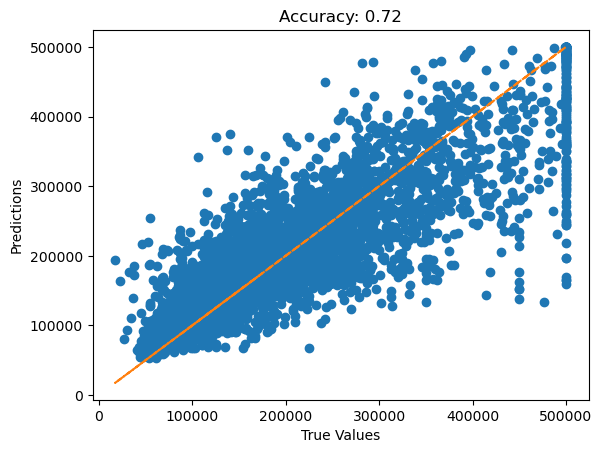

In [20]:
plt.plot(y_test, y_pred, "o")
plt.plot(y_test, y_test, "--")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Accuracy: %.2f" % accuracy)
plt.show()

In [21]:
gb_reg = GradientBoostingRegressor(n_estimators=400, learning_rate=0.2, random_state=42)

In [22]:
gb_reg.fit(X_train_scaled, y_train.ravel())
accuracy = gb_reg.score(X_test_scaled, y_test)
print(accuracy)

0.7140105278841518


In [ ]:
param_grid = {'n_estimators': [400, 410],
              'max_depth': [10, 20, 30, 40],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'bootstrap': [True, False]}
rf = RandomForestRegressor()

In [ ]:
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train.ravel())
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

In [ ]:
# Create the random forest regressor instance
rf_model = RandomForestRegressor(n_estimators=400, random_state=78)
# Fit the model and use .ravel()on the "y_train" data. 
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)
# Calculating the accuracy score
accuracy = rf_model.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

In [ ]:
plt.plot(y_test, predictions, "o")
plt.plot(y_test, y_test, "--")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Accuracy: %.2f" % accuracy)
plt.show()